In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as py
import numpy as np
from imp import reload
import pixie_read_st as pxr

In [29]:
plt.style.use('ggplot')
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['text.usetex']=True

In [47]:
filepath = "/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/sawtooth2.scratch/pixie3d.h5"

## Loading node and cell-based data

In [48]:
import h5py

Loading Coordinate arrays

In [49]:
f = h5py.File(filepath,'r')
timesteps = list(f.keys())
variables = list(f[timesteps[0]].keys())
car_var = list(f[timesteps[0]][variables[0]].keys())
cnv_var = list(f[timesteps[0]][variables[1]].keys())
cov_var = list(f[timesteps[0]][variables[2]].keys())
diag_var = list(f[timesteps[0]][variables[3]].keys())
pert_var = list(f[timesteps[0]][variables[4]].keys())
cell_var = list(f[timesteps[0]][variables[5]].keys())
node_var = list(f[timesteps[0]][variables[6]].keys())
Xc = np.asarray(f[timesteps[0]][variables[5]][cell_var[0]])
Yc = np.asarray(f[timesteps[0]][variables[5]][cell_var[1]])
Zc = np.asarray(f[timesteps[0]][variables[5]][cell_var[2]])
Xc = np.swapaxes(Xc,0,2)
Yc = np.swapaxes(Yc,0,2)
Zc = np.swapaxes(Zc,0,2)
Xn = np.asarray(f[timesteps[0]][variables[6]][node_var[0]])
Yn = np.asarray(f[timesteps[0]][variables[6]][node_var[1]])
Zn = np.asarray(f[timesteps[0]][variables[6]][node_var[2]])
Xn = np.swapaxes(Xn,0,2)
Yn = np.swapaxes(Yn,0,2)
Zn = np.swapaxes(Zn,0,2)

In [50]:
Xc.shape

(128, 64, 64)

In [51]:
Xn.shape

(129, 65, 65)

In [52]:
filepath = "/net/scratch3/giannis_kx/pixie3d/c2n/" 

In [36]:
np.save(filepath+"Xc.npy",Xc)
np.save(filepath+"Zc.npy",Zc)
np.save(filepath+"Xn.npy",Xn)
np.save(filepath+"Zn.npy",Zn)

Loading a cell-centered quantity

In [53]:
B1 = np.asarray([f[ts][variables[1]][cnv_var[0]] for ts in timesteps[0:26]])
B1 = np.swapaxes(B1,0,3)
B1 = np.swapaxes(B1,1,2)
B2 = np.asarray([f[ts][variables[1]][cnv_var[1]] for ts in timesteps[0:26]])
B2 = np.swapaxes(B2,0,3)
B2 = np.swapaxes(B2,1,2)
B3 = np.asarray([f[ts][variables[1]][cnv_var[2]] for ts in timesteps[0:26]])
B3 = np.swapaxes(B3,0,3)
B3 = np.swapaxes(B3,1,2)

In [54]:
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/B1_start.npy",B1)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/B2_start.npy",B2)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/B3_start.npy",B3)

In [38]:
B3.shape

(128, 64, 64, 2)

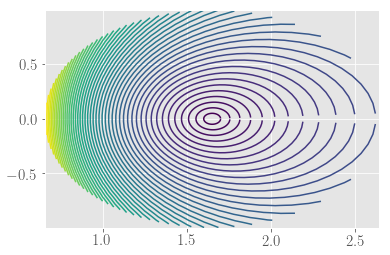

In [39]:
plt.contour(Xc[:,:,0],Zc[:,:,0],B3[:,:,0,0],50)
plt.show()

In [40]:
np.save(filepath+"B3.npy",B3)

Periodicity is off. Lets fix it.

In [49]:
B3p = pxr.periodicity(B3)

In [50]:
B3p.shape

(128, 65, 65, 2)

Need to fix the the coordinates as well

In [51]:
Xcp = pxr.periodicity(Xc)
Ycp = pxr.periodicity(Yc)
Zcp = pxr.periodicity(Zc)

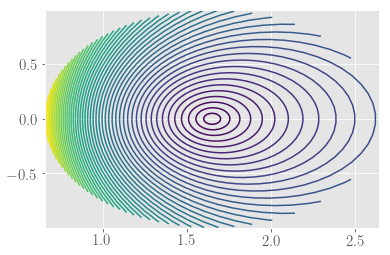

In [52]:
plt.contour(Xcp[:,:,0],Zcp[:,:,0],B3p[:,:,0,0],50)
plt.show()

Loading a node-centered quantity

In [82]:
psi = np.asarray([f[ts][variables[3]][diag_var[4]] for ts in timesteps[0:26]])
psi = np.swapaxes(psi,0,3)
psi= np.swapaxes(psi,1,2)

In [54]:
psi.shape

(129, 65, 65, 2)

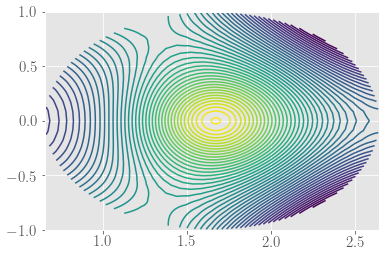

In [55]:
plt.contour(Xn[:,:,0],Zn[:,:,0],psi[:,:,0,0],50)
plt.show()

In [56]:
np.save(filepath+"psin.npy",psi)

Already periodic. Now, we make it cell-centered.

In [57]:
psic = pxr.n2c(psi)

In [58]:
psic.shape

(128, 64, 64, 2)

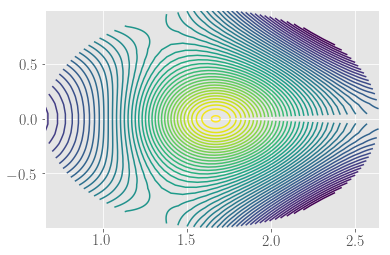

In [59]:
plt.contour(Xc[:,:,0],Zc[:,:,0],psic[:,:,0,0],50)
plt.show()

In [48]:
np.save(filepath+"psic.npy",psic)

Now we make it periodic

In [60]:
psicp = pxr.periodicity(psic)

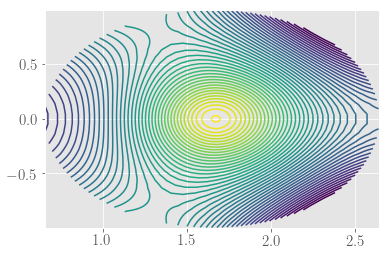

In [61]:
plt.contour(Xcp[:,:,0],Zcp[:,:,0],psicp[:,:,0,0],50)
plt.show()

The way we enforce periodicity is not being done correctly. Obviously. Another issue is whether we need to do it at all. 

Try without imposing periodicity

In [62]:
# Interpolation axes
num_r_cells = B3.shape[0]
num_u_cells = B3.shape[1]
num_phi_cells = B3.shape[2]
dn_r = (1.0/num_r_cells)
dn_u = ((2.0*np.pi)/num_u_cells)
rc = np.linspace(0.0+(dn_r/2.0),1.0-(dn_r/2.0),num=num_r_cells) 
uc = np.linspace(0.0+(dn_u/2.0),2.*np.pi-(dn_u/2.0),num=num_u_cells)
phic = np.linspace(0.0+(dn_u/2.0),2.*np.pi-(dn_u/2.0),num=num_phi_cells)
t = np.linspace(0,B3.shape[3],num=B3.shape[3])    
t_dim = B3.shape[3]

In [63]:
from scipy.interpolate import RegularGridInterpolator

In [64]:
psi_int = RegularGridInterpolator((rc,uc,phic,t), psic[:,:,:,:], method='linear', bounds_error=False, fill_value = None)

In [68]:
B3_int = RegularGridInterpolator((rc,uc,phic,t), B3[:,:,:,:], method='linear', bounds_error=False, fill_value = None)

In [67]:
Xc_int = RegularGridInterpolator((rc,uc,phic), Xc[:,:,:], method='linear', bounds_error=False, fill_value = None)
Zc_int = RegularGridInterpolator((rc,uc,phic), Zc[:,:,:], method='linear', bounds_error=False, fill_value = None)

In [65]:
# node grid for evaluation
rn = np.linspace(0.0,1.0,num=(num_r_cells+1)) 
un = np.linspace(0.0,2.*np.pi,num=(num_u_cells+1))
phin = np.linspace(0.0,2.*np.pi,num=(num_phi_cells+1))

In [66]:
RRRI,TTTI,PPPI,TIM = np.meshgrid(rn,un,phin,t,indexing='ij') # 4D
RI,TI,PI = np.meshgrid(rn,un,phin,indexing='ij') # 3D

In [69]:
# node grid evaluated functions
psi_ngrid = psi_int((RRRI,TTTI,PPPI,TIM))
Xc_ngrid = Xc_int((RI,TI,PI))
Zc_ngrid = Zc_int((RI,TI,PI))
B3_ngrid = B3_int((RRRI,TTTI,PPPI,TIM))

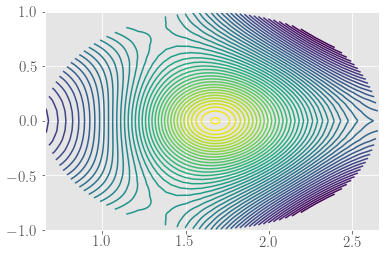

In [71]:
plt.contour(Xc_ngrid[:,:,0],Zc_ngrid[:,:,0],psi_ngrid[:,:,0,0],50)
plt.show()

In [73]:
dpsin = psi-psi_ngrid

In [74]:
np.amax(dpsin)

0.00091388218176838287

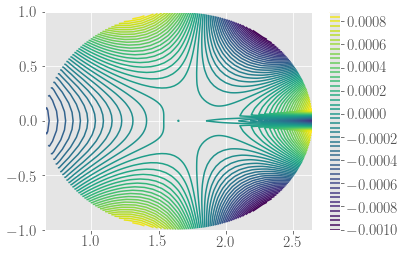

In [75]:
plt.contour(Xn[:,:,0],Zn[:,:,0],dpsin[:,:,0,0],50)
plt.colorbar()
plt.show()

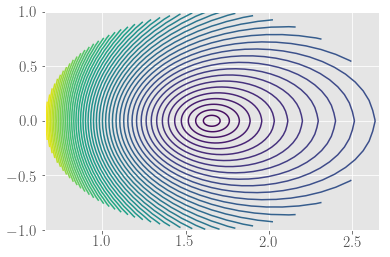

In [50]:
plt.contour(Xc_ngrid[:,:,0],Zc_grid[:,:,0],B3_ngrid[:,:,0,0],50)
plt.show()

Try to do the same thing with the arrays that have enforced periodicity with the extra cell

In [27]:
# Interpolation axes with added cell 
ucp = np.linspace(0.0+(dn_u/2.0),2.*np.pi+(dn_u/2.0),num=(num_u_cells+1))
phicp = np.linspace(0.0+(dn_u/2.0),2.*np.pi+(dn_u/2.0),num=(num_phi_cells+1))

In [28]:
psip_int = RegularGridInterpolator((rc,ucp,phicp,t), psicp[:,:,:,:], method='linear', bounds_error=False, fill_value = None)

In [29]:
B3p_int = RegularGridInterpolator((rc,ucp,phicp,t), B3p[:,:,:,:], method='linear', bounds_error=False, fill_value = None)

In [30]:
Xcp_int = RegularGridInterpolator((rc,ucp,phicp), Xcp[:,:,:], method='linear', bounds_error=False, fill_value = None)
Zcp_int = RegularGridInterpolator((rc,ucp,phicp), Zcp[:,:,:], method='linear', bounds_error=False, fill_value = None)

In [31]:
# node grid evaluated functions
psip_ngrid = psip_int((RRRI,TTTI,PPPI,TIM))
Xcp_ngrid = Xcp_int((RI,TI,PI))
Zcp_ngrid = Zcp_int((RI,TI,PI))
B3p_ngrid = B3p_int((RRRI,TTTI,PPPI,TIM))

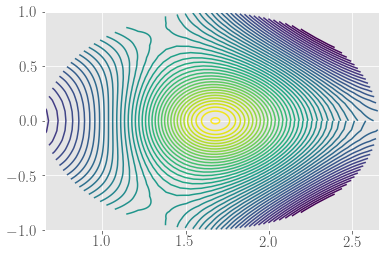

In [32]:
plt.contour(Xcp_ngrid[:,:,0],Zcp_ngrid[:,:,0],psip_ngrid[:,:,0,0],50)
plt.show()

## Loading node-based arrays from file

In [55]:
B1 = np.load("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/B1n_start.npy")
B2 = np.load("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/B2n_start.npy")
B3 = np.load("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/B3n_start.npy")

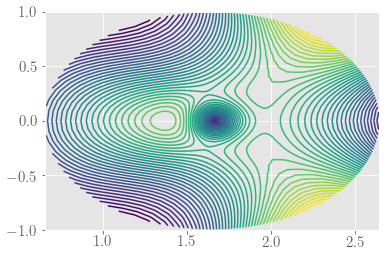

In [73]:
plt.contour(Xn[:,:,0],Zn[:,:,0],B2[:,:,0,0],50)
plt.show()

In [46]:
B1.shape

(129, 66, 66, 26)

In [61]:
filepath2 = "/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/sawtooth2.scratch/pixie3d.h5"

In [62]:
pxr.pixieload(filepath2)

timesteps= 706
Dictionary of terms:
Variables: ['Car_variables', 'Cnv_variables', 'Cov_variables', 'Diagnostics', 'Perturbations', 'cells', 'nodes']
Cartesian: ['Bx', 'By', 'Bz', 'Jx', 'Jy', 'Jz', 'Prs', 'Ve_1', 'Ve_2', 'Ve_3', 'Vx', 'Vy', 'Vz', 'rho']
Contravariant: ['B^1', 'B^2', 'B^3', 'J*P^2', 'J.(pi+pe)', 'J.Rho', 'J^1', 'J^2', 'J^3', 'P^1', 'P^3']
Covariant: ['B_1', 'B_2', 'B_3', 'J_1', 'J_2', 'J_3', 'T=Te+Ti', 'V_1', 'V_2', 'V_3', 'rho']
Diagnostic: ['E_1', 'E_2', 'E_3', 'Int. heat src', 'Poloidal flux', 'Temperature', 'chi par', 'chi perp', 'diff', 'eta', 'lambda', 'local div(B)', 'local div(J)', 'local div(V)', 'nu', 'q factor']
Perturbations: ['B^1_pert', 'B^2_pert', 'B^3_pert', 'P^1_pert', 'P^2_pert', 'P^3_pert', 'Prs_pert', 'Rho_pert']
Cell: ['X', 'Y', 'Z']
Node: ['X', 'Y', 'Z']


In [63]:
B1c = pxr.load_array(1,0,0,26) # small2
B2c = pxr.load_array(1,1,0,26) 
B3c = pxr.load_array(1,2,0,26)

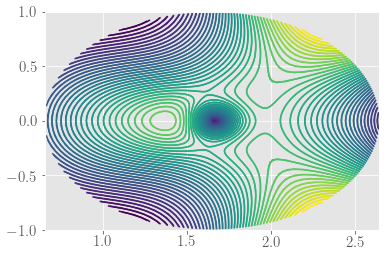

In [66]:
plt.contour(Xn[:,:,0],Zn[:,:,0],B2[:,:,0,0],50)
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],B2c[:,:,0,0],50)
plt.show()

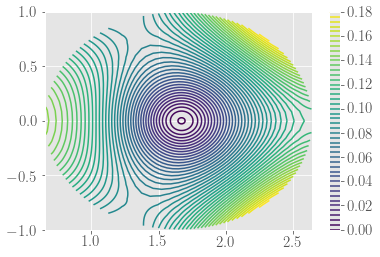

In [79]:
plt.contour(Xn[:,:,0],Zn[:,:,0],-psi[:,:,0,0],50)
plt.colorbar()
plt.show()

In [90]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [91]:
pxr.pixieload(filepath2)

timesteps= 706
Dictionary of terms:
Variables: ['Car_variables', 'Cnv_variables', 'Cov_variables', 'Diagnostics', 'Perturbations', 'cells', 'nodes']
Cartesian: ['Bx', 'By', 'Bz', 'Jx', 'Jy', 'Jz', 'Prs', 'Ve_1', 'Ve_2', 'Ve_3', 'Vx', 'Vy', 'Vz', 'rho']
Contravariant: ['B^1', 'B^2', 'B^3', 'J*P^2', 'J.(pi+pe)', 'J.Rho', 'J^1', 'J^2', 'J^3', 'P^1', 'P^3']
Covariant: ['B_1', 'B_2', 'B_3', 'J_1', 'J_2', 'J_3', 'T=Te+Ti', 'V_1', 'V_2', 'V_3', 'rho']
Diagnostic: ['E_1', 'E_2', 'E_3', 'Int. heat src', 'Poloidal flux', 'Temperature', 'chi par', 'chi perp', 'diff', 'eta', 'lambda', 'local div(B)', 'local div(J)', 'local div(V)', 'nu', 'q factor']
Perturbations: ['B^1_pert', 'B^2_pert', 'B^3_pert', 'P^1_pert', 'P^2_pert', 'P^3_pert', 'Prs_pert', 'Rho_pert']
Cell: ['X', 'Y', 'Z']
Node: ['X', 'Y', 'Z']


In [92]:
pxr.Axes_of_Interpolation(B1)

In [93]:
pxr.Grid_Interpolations(-psi,B1,B2,B3)

Logical Grid Interpolations done. All array (A) interpolators take A_int.


In [94]:
pxr.Calculation_of_Units_and_Sizes()

Units and sizes calculated.


In [96]:
reload(pxr)

<module 'pixie_read_st' from '/turquoise/users/giannis_kx/python_pixie/pixie_read_st.py'>

In [97]:
psi_min, norm = pxr.Normalization_numbers(-psi[:,:,0,:],pxr.B1tor,pxr.B2tor)

t= 0 is done
t= 10 is done
t= 20 is done


In [98]:
r_of_psi, r_ma = pxr.create_r_psi_list(-psi[:,:,0,:],pxr.B1tor,pxr.B2tor)

t= 0 is done
t= 10 is done
t= 20 is done


In [102]:
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/psi_min_start.npy",psi_min)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/norm_start.npy",norm)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/r_of_psi_start.npy",r_of_psi)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/rmaxis_start.npy",r_ma)

In [103]:
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/psi_start.npy",-psi)

In [101]:
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/X.npy",pxr.X)
np.save("/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/Z.npy",pxr.Z)